In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json("/mnt/c/Users/Lucas/Downloads/alg2/tp2/TSP/results/report.json")

In [3]:
df.head()

,tempo,memoria,tamanho,tipo,proporcao
0,0.004168,11.656250,5,branch,1.000000
1,0.001673,104.348633,5,christofides,1.086490
2,0.000421,15.226562,5,twice,1.203479
3,0.021599,9.061523,10,branch,1.000000
4,0.001311,43.490234,10,christofides,1.104313


In [4]:
df["tempo"] = df["tempo"] * 1000
df["tempo"] = df["tempo"].round(3)
df["proporcao"] = df["proporcao"].round(2)

In [5]:
df.describe()

,tempo,memoria,tamanho,proporcao
count,32.000000,32.000000,32.000000,32.000000
mean,30546.354062,26112.138763,559.812500,1.210000
std,96108.944457,94812.226557,711.300782,0.164061
min,0.421000,9.061523,5.000000,1.000000
25%,3.793750,43.014160,15.000000,1.107500
50%,649.144500,906.873535,205.000000,1.150000
75%,9591.780000,4899.985352,852.250000,1.352500
max,497906.071000,531155.039062,2319.000000,1.570000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tempo      32 non-null     float64
 1   memoria    32 non-null     float64
 2   tamanho    32 non-null     int64  
 3   tipo       32 non-null     object 
 4   proporcao  32 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.4+ KB


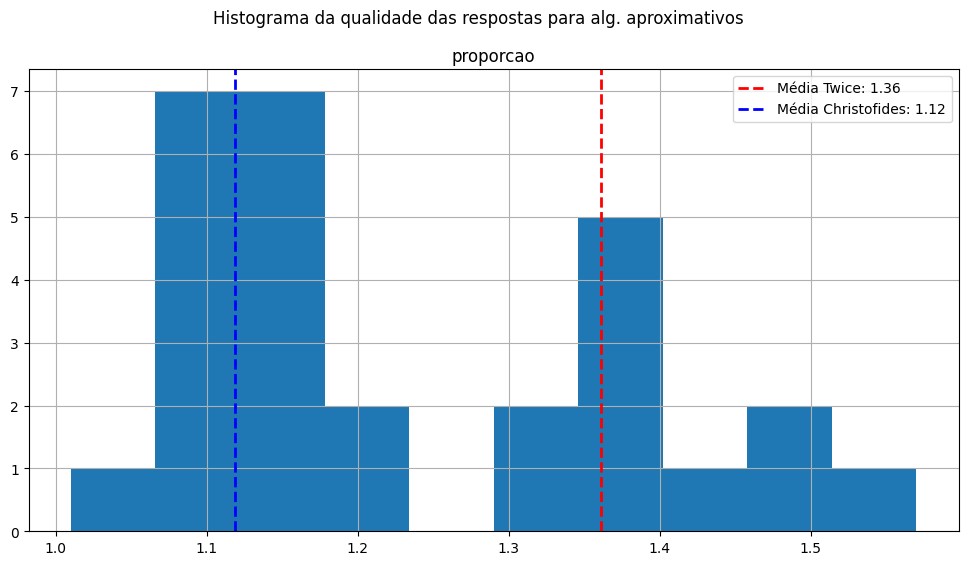

In [7]:
df_filtered = df[df['tipo'] != 'branch']
media_twice = df_filtered[df_filtered['tipo'] == 'twice']['proporcao'].mean()
media_christofides = df_filtered[df_filtered['tipo'] == 'christofides']['proporcao'].mean()

df_filtered.hist(column=['proporcao'], bins=10, figsize=(12, 6))
plt.suptitle('Histograma da qualidade das respostas para alg. aproximativos')
plt.axvline(media_twice, color='red', linestyle='dashed', linewidth=2, label=f'Média Twice: {media_twice:.2f}')
plt.axvline(media_christofides, color='blue', linestyle='dashed', linewidth=2, label=f'Média Christofides: {media_christofides:.2f}')
plt.legend()
plt.show()

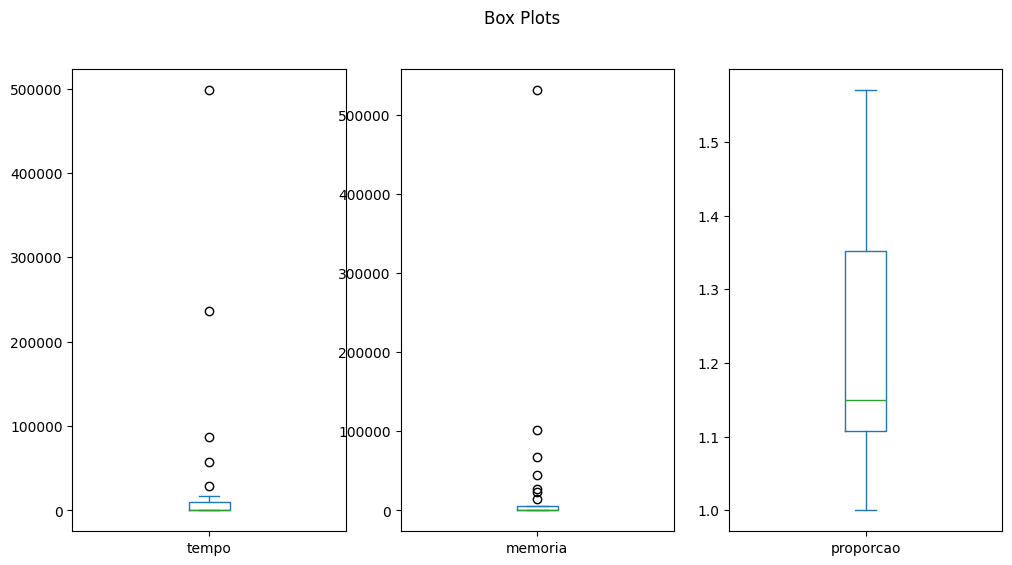

In [8]:
df[['tempo', 'memoria', 'proporcao']].plot(kind='box', subplots=True, layout=(1, 3), figsize=(12, 6), title='Box Plots')
plt.show()

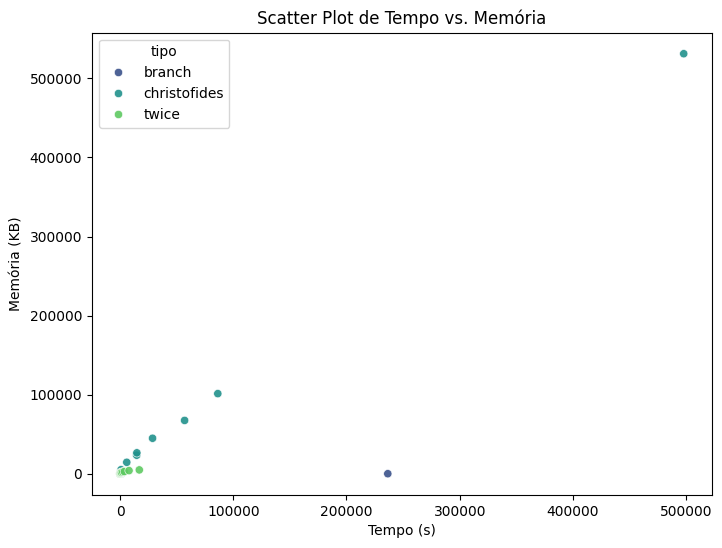

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='tempo', y='memoria', hue='tipo', palette='viridis', alpha=0.9)
plt.title('Scatter Plot de Tempo vs. Memória')
plt.xlabel('Tempo (s)')
plt.ylabel('Memória (KB)')
plt.show()

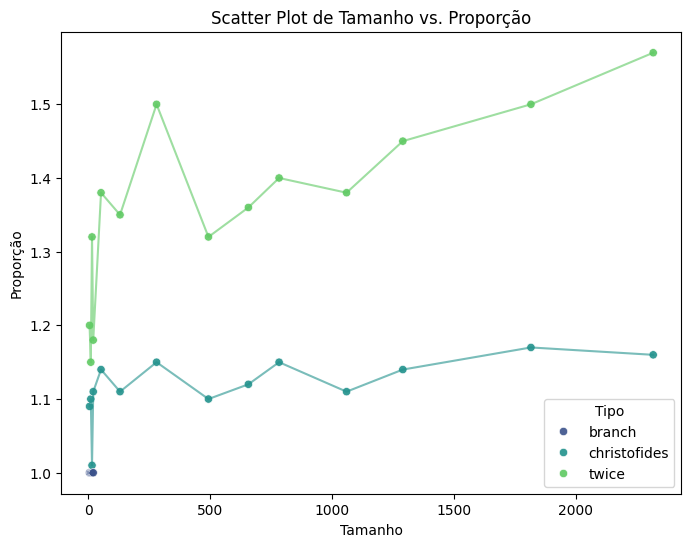

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='tamanho', y='proporcao', hue='tipo', palette='viridis', alpha=0.9)
sns.lineplot(data=df, x='tamanho', y='proporcao', hue='tipo', palette='viridis', alpha=0.6, legend=False)
plt.title('Scatter Plot de Tamanho vs. Proporção')
plt.xlabel('Tamanho')
plt.ylabel('Proporção')
plt.legend(title='Tipo')
plt.show()

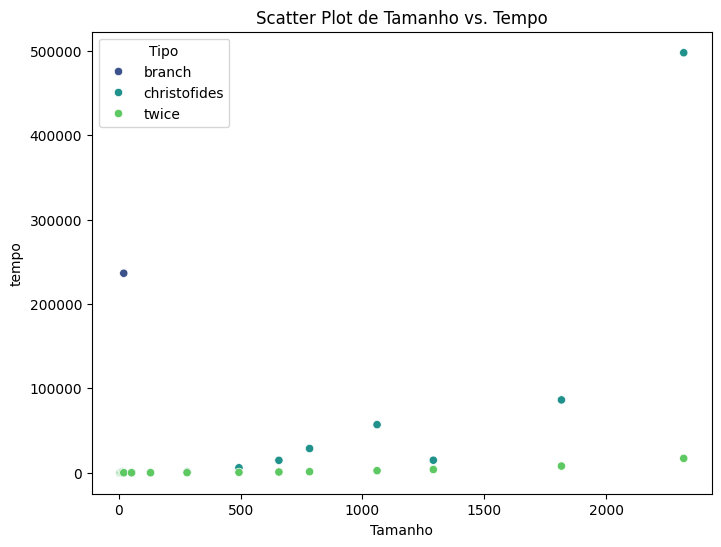

In [ ]:
    plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='tamanho', y='tempo', hue='tipo', palette='viridis', alpha=1)
plt.title('Scatter Plot de Tamanho vs. Tempo')
plt.xlabel('Tamanho')
plt.ylabel('tempo')
plt.legend(title='Tipo')
plt.show()

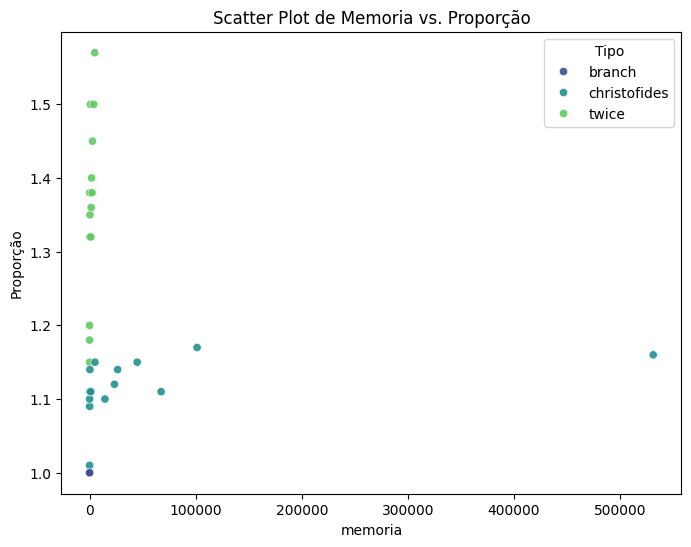

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='memoria', y='proporcao', hue='tipo', palette='viridis', alpha=0.9)
plt.title('Scatter Plot de Memoria vs. Proporção')
plt.xlabel('memoria')
plt.ylabel('Proporção')
plt.legend(title='Tipo')
plt.show()

/tmp/ipykernel_204416/2296422474.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values, x='tipo', y='tempo', ax=axs[0], palette='viridis')
/tmp/ipykernel_204416/2296422474.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values, x='tipo', y='memoria', ax=axs[1], palette='viridis')
/tmp/ipykernel_204416/2296422474.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values, x='tipo', y='proporcao', ax=axs[2], palette='viridis')


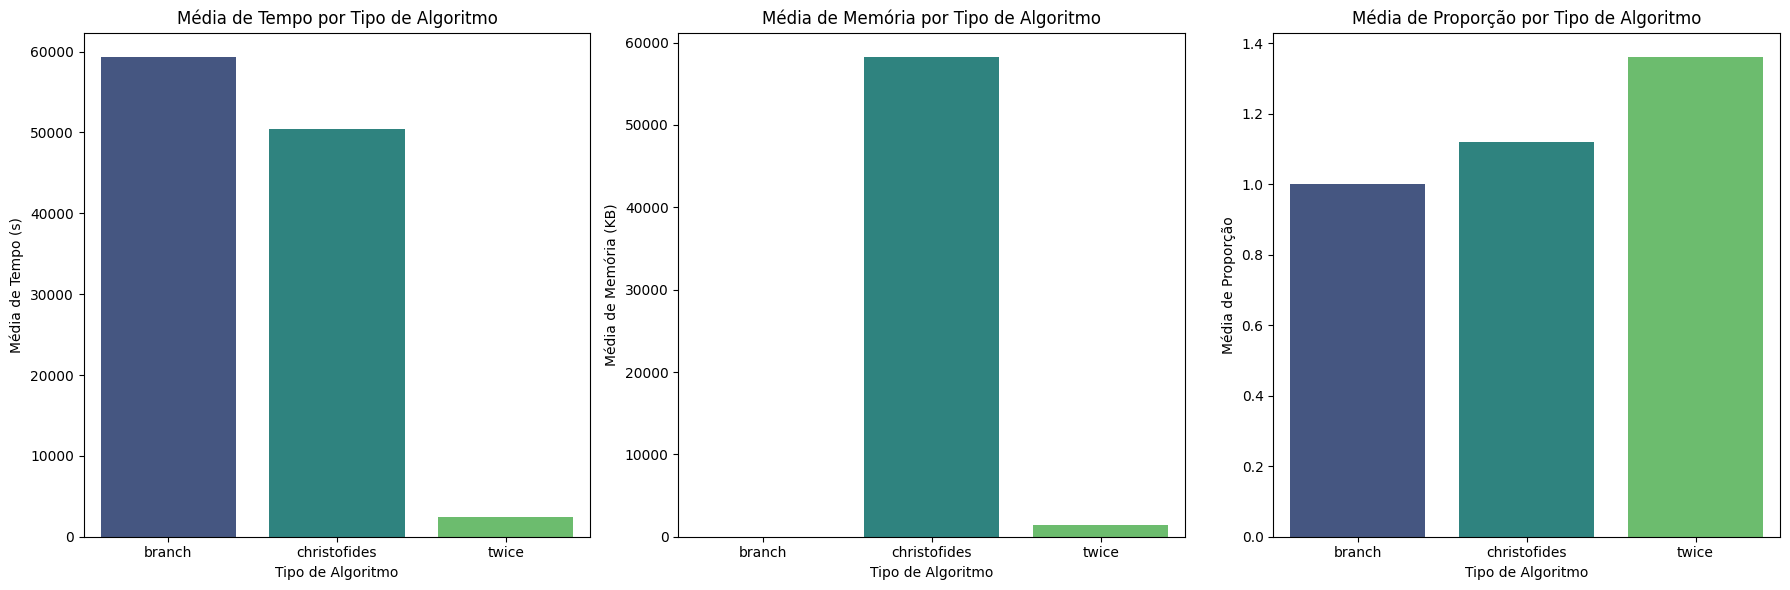

In [ ]:
mean_values = df.groupby('tipo').mean().reset_index()
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de barras para 'tempo'
sns.barplot(data=mean_values, x='tipo', y='tempo', ax=axs[0], palette='viridis')
axs[0].set_title('Média de Tempo por Tipo de Algoritmo')
axs[0].set_xlabel('Tipo de Algoritmo')
axs[0].set_ylabel('Média de Tempo (s)')

# Gráfico de barras para 'memoria'
sns.barplot(data=mean_values, x='tipo', y='memoria', ax=axs[1], palette='viridis')
axs[1].set_title('Média de Memória por Tipo de Algoritmo')
axs[1].set_xlabel('Tipo de Algoritmo')
axs[1].set_ylabel('Média de Memória (KB)')

# Gráfico de barras para 'proporcao'
sns.barplot(data=mean_values, x='tipo', y='proporcao', ax=axs[2], palette='viridis')
axs[2].set_title('Média de Proporção por Tipo de Algoritmo')
axs[2].set_xlabel('Tipo de Algoritmo')
axs[2].set_ylabel('Média de Proporção')

plt.tight_layout()
plt.show()